In [ ]:
drive_mount = ''
data_dir=''

In [ ]:
from google.colab import drive
drive.mount(drive_mount)

Mounted at /content/drive/


In [ ]:
import os
os.chdir(data_dir)

In [ ]:
# !pwd

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)

In [ ]:
train_df = pd.read_csv("train.csv")

In [ ]:
# train_df.head()

In [ ]:
train_df.shape

(57477, 9)

In [ ]:
train_df.iloc[0]['prompt']

'["Is it morally right to try to have a certain percentage of females on managerial positions?","OK, does pineapple belong on a pizza? Relax and give me fun answer."]'

In [ ]:
eval(train_df.iloc[0]['prompt'])

['Is it morally right to try to have a certain percentage of females on managerial positions?',
 'OK, does pineapple belong on a pizza? Relax and give me fun answer.']

In [ ]:
train_df.iloc[0]['response_a']

'["The question of whether it is morally right to aim for a certain percentage of females in managerial positions is a complex ethical issue that involves considerations of fairness, equality, diversity, and discrimination.\\n\\nHere are some arguments in favor of and against such policies:\\n\\n**Arguments in favor:**\\n\\n1. **Correcting Historical Inequities:** Women have historically been underrepresented in leadership roles due to various cultural, institutional, and social barriers. Aiming for a specific percentage can be seen as a corrective measure to address past and ongoing discrimination.\\n\\n2. **Promoting Diversity:** Diverse leadership teams can enhance decision-making and represent a broader range of perspectives. This can lead to better outcomes for organizations and society as a whole.\\n\\n3. **Equality of Opportunity:** Setting targets for female representation in management can help ensure that women have equal opportunities to advance in their careers.\\n\\n4. **R

In [ ]:
train_df.iloc[0]['response_b']

'["As an AI, I don\'t have personal beliefs or opinions. However, I can tell you that the question of gender quotas in managerial positions is a complex one and positions can vary. Advocates argue that such measures can help correct historical imbalances, promote diversity, and may lead to better decision-making. Critics may argue that positions should be based purely on merit, and that quotas could potentially lead to tokenism or unqualified candidates being promoted. Morality can be subjective and differs from person to person based on their personal beliefs, cultural background, and values. It\'s a topic with valid arguments on both sides, and it\'s up to each individual or organization to decide what they believe is right.","As an AI, I don\'t eat, so I don\'t have personal preferences. But, in the world of pizza, the pineapple topping is a hotly debated topic! Some people love the sweet and savory mix it brings to a pizza, a flavor combination made famous by the Hawaiian pizza. Ot

In [ ]:
## Categorize the winner model result
train_df['winner_result'] = train_df[['winner_model_a','winner_model_b','winner_tie']].idxmax(axis=1)
train_df['winner_model_name'] = np.where(train_df['winner_result']=='winner_model_a',train_df['model_a'],
                                         np.where(train_df['winner_result']=='winner_model_b',train_df['model_b'],'winner_tie'))
train_df['label'] = np.where(train_df['winner_result'] == 'winner_model_a', 0,
                             np.where(train_df['winner_result']=='winner_model_b',1,2))

In [ ]:
train_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner_result,winner_model_name,label
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,winner_model_a,gpt-4-1106-preview,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,winner_model_b,gpt-4-0613,1
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,winner_tie,winner_tie,2
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,winner_model_a,llama-2-13b-chat,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,winner_model_b,gpt-3.5-turbo-0314,1


In [ ]:
train_df['prompt'] = train_df['prompt'].apply(lambda x: eval(x))
train_df['response_a'] = train_df['response_a'].apply(lambda x: eval(x.replace("null","np.nan")))
train_df['response_b'] = train_df['response_b'].apply(lambda x:eval(x.replace("null","np.nan")))

In [ ]:
train_df = train_df.explode(['prompt', 'response_a','response_b'])

In [ ]:
train_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner_result,winner_model_name,label
0,30192,gpt-4-1106-preview,gpt-4-0613,Is it morally right to try to have a certain p...,The question of whether it is morally right to...,"As an AI, I don't have personal beliefs or opi...",1,0,0,winner_model_a,gpt-4-1106-preview,2
0,30192,gpt-4-1106-preview,gpt-4-0613,"OK, does pineapple belong on a pizza? Relax an...","Ah, the age-old culinary conundrum that has di...","As an AI, I don't eat, so I don't have persona...",1,0,0,winner_model_a,gpt-4-1106-preview,2
1,53567,koala-13b,gpt-4-0613,What is the difference between marriage licens...,A marriage license is a legal document that al...,A marriage license and a marriage certificate ...,0,1,0,winner_model_b,gpt-4-0613,2
1,53567,koala-13b,gpt-4-0613,How can I get both of them as quick as possibl...,If you want to get both a marriage license and...,"In California, here are the general steps to o...",0,1,0,winner_model_b,gpt-4-0613,2
1,53567,koala-13b,gpt-4-0613,What is the minimal time to get them? 1 day or...,The minimal time to get a marriage license and...,The marriage license in California is issued i...,0,1,0,winner_model_b,gpt-4-0613,2


# EAD
* Encode failure: Some model fail in the middle of a prompt session, but still become the winner model


In [ ]:
train_df['RowNum'] = train_df.groupby('id').cumcount() + 1
train_df['session'] = train_df['id'].astype(str) + '_' + train_df['RowNum'].astype(str)
train_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner_result,winner_model_name,label,RowNum,session
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,winner_model_a,gpt-4-1106-preview,0,1,30192_1
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,winner_model_b,gpt-4-0613,1,1,53567_1
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,winner_tie,winner_tie,2,1,65089_1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,winner_model_a,llama-2-13b-chat,0,1,96401_1
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,winner_model_b,gpt-3.5-turbo-0314,1,1,198779_1


In [ ]:
train_df.loc[train_df['response_b'].isnull()].head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner_result,winner_model_name,label,RowNum,session


In [ ]:
train_df.loc[train_df['id'] == 57180984]

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner_result,winner_model_name,label,RowNum,session
780,57180984,claude-instant-1,llama-2-70b-chat,"[""I want you to act as if you are a classic te...",[null],[null],0,0,1,winner_tie,winner_tie,2,1,57180984_1


In [ ]:
train_df.loc[train_df['id'] == 134445396]

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner_model_name,label,RowNum,session
1763,134445396,codellama-34b-instruct,llama-2-7b-chat,Create a game,"Sure, I'd be happy to help you create a game! ...","Sure, I'd be happy to help you create a game! ...",0,1,0,winner_model_b,1,1,134445396_1
1763,134445396,codellama-34b-instruct,llama-2-7b-chat,Code,"To create a list of words in a specific order,...",Sure! Here's a simple text-based adventure gam...,0,1,0,winner_model_b,1,2,134445396_2
1763,134445396,codellama-34b-instruct,llama-2-7b-chat,Create a game with the code,NaN,NaN,0,1,0,winner_model_b,1,3,134445396_3


In [ ]:
train_df['encode_fail_a'] = np.where(train_df['response_a'].isnull(),1,0)
train_df['encode_fail_b'] = np.where(train_df['response_b'].isnull(),1,0)

In [ ]:
# train_df.groupby('RowNum')[['encode_fail_a','encode_fail_b']].value_counts() ## Does not seems like longer session result in more failure

In [ ]:
train_df['max_session'] = train_df.groupby('id')['RowNum'].transform('max')

In [ ]:
## Some model fail in the middle session but still won
# train_df.query("encode_fail_a == 1 or encode_fail_b == 1 and max_session>RowNum") #.groupby('winner_model_name').count()

In [ ]:
## Which model is more likely to fail?
train_df['fail_model'] = np.where((train_df['encode_fail_a']==1) & (train_df['encode_fail_b']==1),'both_fail',
                                  np.where((train_df['encode_fail_a']==1) & (train_df['encode_fail_b']==0), train_df['model_a'],
                                  np.where((train_df['encode_fail_a']==0) & (train_df['encode_fail_b']==1), train_df['model_b'], 'none_fail' )))




<Axes: xlabel='fail_model'>

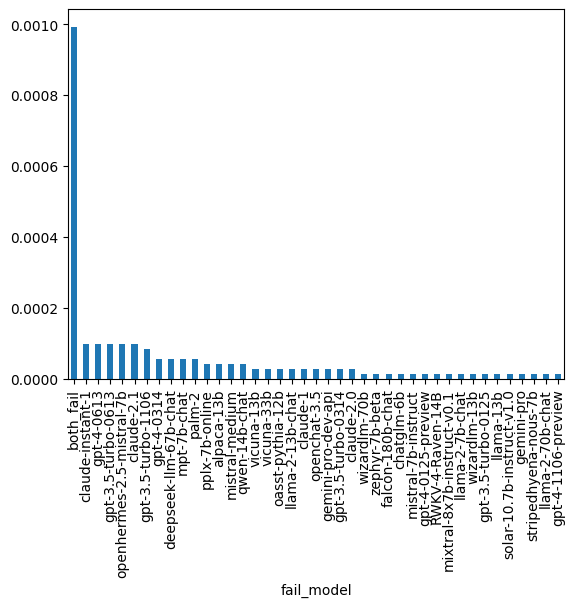

In [ ]:
train_df['fail_model'].value_counts(normalize=True).iloc[1:].plot(kind='bar')

In [ ]:
## Which two models are more likely to be compared together?

In [ ]:
## Lets remove the data where both model fail and the result is not tie
train_df = train_df.drop(train_df.query("fail_model == 'both_fail' and label!=2").index,axis=0)
train_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner_result,winner_model_name,label,RowNum,session,encode_fail_a,encode_fail_b,max_session,fail_model
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,winner_model_a,gpt-4-1106-preview,0,1,30192_1,0,0,1,none_fail
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,winner_model_b,gpt-4-0613,1,1,53567_1,0,0,1,none_fail
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,winner_tie,winner_tie,2,1,65089_1,0,0,1,none_fail
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,winner_model_a,llama-2-13b-chat,0,1,96401_1,0,0,1,none_fail
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,winner_model_b,gpt-3.5-turbo-0314,1,1,198779_1,0,0,1,none_fail


In [ ]:
# train_df.loc[train_df['response_a'].isnull()]

In [ ]:
train_df.loc[train_df['id']==16350735][['response_a']]

,response_a
207,I do not have any confirmed details about a Wo...
207,NaN


# We can treat the problem like a multiple choice classification problem

In [ ]:

def get_options(row):
  if row['response_a']=='NaN':
    res_a = ''
  else:
    res_a = row['response_a']

  if row['response_b']=='NaN':
    res_b = ''
  else:
    res_b = row['response_b']
  return [res_a,res_b,'both']

train_df['options'] = train_df.apply(lambda x:get_options(x),axis=1)

In [ ]:
train_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner_result,winner_model_name,label,RowNum,session,encode_fail_a,encode_fail_b,max_session,fail_model,options
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,winner_model_a,gpt-4-1106-preview,0,1,30192_1,0,0,1,none_fail,"[[""The question of whether it is morally right..."
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,winner_model_b,gpt-4-0613,1,1,53567_1,0,0,1,none_fail,"[[""A marriage license is a legal document that..."
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,winner_tie,winner_tie,2,1,65089_1,0,0,1,none_fail,"[[""Function calling is the process of invoking..."
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,winner_model_a,llama-2-13b-chat,0,1,96401_1,0,0,1,none_fail,"[[""Creating a test set for a very rare categor..."
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,winner_model_b,gpt-3.5-turbo-0314,1,1,198779_1,0,0,1,none_fail,"[[""The best way to travel from Tel Aviv to Jer..."


# Train a model for the multiple choice classification

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForMultipleChoice, get_scheduler
# from transformers.optimization import AdamW
from torch.optim import AdamW
from tqdm import tqdm
import torch.nn.functional as F

In [ ]:
# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForMultipleChoice.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_examples = train_df[['session','prompt','options','label']].to_dict(orient='records')

In [ ]:




# Dataset class
class MultipleChoiceDataset(Dataset):
    def __init__(self, examples, tokenizer, max_length=128):
        self.examples = examples
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        example = self.examples[idx]
        prompt = example["prompt"]
        options = example["options"]
        label = example["label"]

        # Encode each (context + choice) spair
        inputs = self.tokenizer(
            [str(prompt) + " " + str(option) for option in options],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors="pt"
        )

        # Shape: (num_choices, seq_len)
        input_ids = inputs["input_ids"]
        attention_mask = inputs["attention_mask"]

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": torch.tensor(label)
        }





In [ ]:
dataset = MultipleChoiceDataset(train_examples, tokenizer)
dataloader = DataLoader(dataset, batch_size=20)

In [ ]:
dataset.examples[0]

{'session': '30192_1',
 'prompt': '["Is it morally right to try to have a certain percentage of females on managerial positions?","OK, does pineapple belong on a pizza? Relax and give me fun answer."]',
 'options': ['["The question of whether it is morally right to aim for a certain percentage of females in managerial positions is a complex ethical issue that involves considerations of fairness, equality, diversity, and discrimination.\\n\\nHere are some arguments in favor of and against such policies:\\n\\n**Arguments in favor:**\\n\\n1. **Correcting Historical Inequities:** Women have historically been underrepresented in leadership roles due to various cultural, institutional, and social barriers. Aiming for a specific percentage can be seen as a corrective measure to address past and ongoing discrimination.\\n\\n2. **Promoting Diversity:** Diverse leadership teams can enhance decision-making and represent a broader range of perspectives. This can lead to better outcomes for organiz

In [ ]:
# Create dataset and dataloader


# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=5e-5)
num_training_steps = len(dataloader) * 3  # epochs = 3
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.train()
for epoch in range(3):
    loop = tqdm(dataloader, leave=True)
    for batch in loop:
        input_ids = batch["input_ids"].to(device)       # shape: (batch_size, num_choices, seq_len)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())


Epoch 2: 100%|██████████| 2874/2874 [1:07:46<00:00,  1.41s/it, loss=0.653]


In [ ]:
torch.save(model, './entire_model.pth')

In [ ]:
# dataset.examples['prompt']

In [ ]:
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForMultipleChoice(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, ele

In [ ]:
def predict_with_probs(prompt, options):
    # Prepare input
    inputs = tokenizer(
        [str(prompt) + " " + str(option) for option in options],
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

    # Reshape to (1, num_choices, seq_len)
    input_ids = inputs["input_ids"].unsqueeze(0).to(device)
    attention_mask = inputs["attention_mask"].unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits  # shape: (1, num_choices)
        probs = F.softmax(logits, dim=1)  # softmax over choices
        predicted_index = torch.argmax(probs, dim=1).item()

    prob_values = probs[0].cpu().tolist()

    # Return choice index, answer text, and probabilities
    return {
        "predicted_index": predicted_index,
        "predicted_choice": options[predicted_index],
        "probabilities": list(zip(options, prob_values))
    }


In [ ]:
prompt = train_df.iloc[0]['prompt']
options= train_df.iloc[0]['options']

result = predict_with_probs( prompt, options)

print(f"Predicted choice: {result['predicted_choice']} (index {result['predicted_index']})")
print("Probabilities:")
for i, (choice, prob) in enumerate(result["probabilities"]):
    print(f"option {i}: {prob:.4f} \n {choice}")

Predicted choice: ["The question of whether it is morally right to aim for a certain percentage of females in managerial positions is a complex ethical issue that involves considerations of fairness, equality, diversity, and discrimination.\n\nHere are some arguments in favor of and against such policies:\n\n**Arguments in favor:**\n\n1. **Correcting Historical Inequities:** Women have historically been underrepresented in leadership roles due to various cultural, institutional, and social barriers. Aiming for a specific percentage can be seen as a corrective measure to address past and ongoing discrimination.\n\n2. **Promoting Diversity:** Diverse leadership teams can enhance decision-making and represent a broader range of perspectives. This can lead to better outcomes for organizations and society as a whole.\n\n3. **Equality of Opportunity:** Setting targets for female representation in management can help ensure that women have equal opportunities to advance in their careers.\n\n4

In [ ]:
result['probabilities'][2][1]

0.03286103159189224

In [ ]:
def get_result(row):
  result = predict_with_probs(row['prompt'],row['options'])


  return {'predicted_label': result['predicted_index'], 'predicted_prefered_response': result['predicted_choice'], 'predicted_prob_a':result['probabilities'][0][1], 'predicted_prob_b':result['probabilities'][1][1], 'predicted_prob_both':result['probabilities'][2][1] }

In [ ]:
train_df[['pred_label','pred_response','pred_a','pred_b','pred_both']] = train_df.apply(lambda x:get_result(x), axis=1, result_type='expand')


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
def get_performance(pred, truth):
  cm = confusion_matrix(truth, pred)
  accuracy = accuracy_score(truth, pred)
  precision = precision_score(truth, pred, average='weighted')
  recall = recall_score(truth, pred, average='weighted')
  f1 = f1_score(truth, pred, average='weighted')
  target_names = ['response_a', 'response_b', 'tied']
  print(classification_report(truth, pred, target_names=target_names))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
  disp.plot()
  plt.show()
  return cm, accuracy, precision, recall, f1


              precision    recall  f1-score   support

  response_a       0.62      0.78      0.69     20064
  response_b       0.76      0.63      0.69     19652
        tied       0.73      0.66      0.69     17761

    accuracy                           0.69     57477
   macro avg       0.71      0.69      0.69     57477
weighted avg       0.70      0.69      0.69     57477



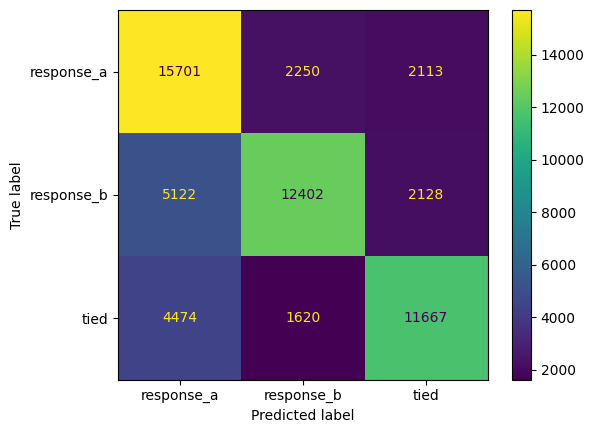

In [ ]:
cm, accuracy, precision, recall, f1 = get_performance(train_df['pred_label'],train_df['label'])

In [ ]:
accuracy

0.69192894549124